# PROJECT TITLE: Predicting and Aiding Post-partum Depression Symptoms via Talkbot

MEMBERS: Navina, Uthara, Harshaadhithya

# Introduction


Postpartum depression is a mental illness that affects the behavior and physical health of new mothers. According to [Womenshealth.gov](https://www.womenshealth.gov/mental-health/mental-health-conditions/postpartum-depression), It is not uncommon for new mothers to experience brief periods of sadness and other symptoms of postpartum depression  after giving birth.  <br> 
One  out of every nine new mothers are confronted with feelings of sadness, inability to sleep, eating too much or not enough, and inability to focus  that exceeds 2 weeks.<br>
Many of these women don't seek  professional help in fear of being viewed as being a bad mother. Women who have low social support and previous history of depression are at risk for developing Postpartum depression. <br>
It is also possible for women who don’t have any health issues to develop the illness.  If left untreated, Postpartum depression can negatively impact the mother's ability to provide the care needed to raise a  healthy child. <br>

Another concerning mental  illness, closely aligned with Postpartum depression  is Postpartum psychosis. This is  a medical emergency that  occurs in up to 4 new mothers out of every 1,000 births. Hurting themselves or their baby is one of several symptoms that may be experienced by mothers with this condition. <br>

Our Project will analyze the questionnaire answers to determine if the dataset aligns with the research that indicates one out of nine  new mothers develop Postpartum depression and  4 new mothers out of 1,000 develop Postpartum psychosis.<br>[Womenshealth.gov](https://www.womenshealth.gov/mental-health/mental-health-conditions/postpartum-depression).





# Dataset Link:
https://www.kaggle.com/datasets/parvezalmuqtadir2348/postpartum-depression


# Data Importing

In [2]:

import numpy as np 
import scipy.stats
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [3]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as pp
import seaborn as sns

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [4]:
import re
import mailbox
import csv

In [5]:

df = pd.read_csv(r"D:\Datasets\post natal data.csv")

# Data Outline

In [6]:

df.head() 

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [7]:

df.shape

(1503, 11)

In [8]:


df.columns

Index(['Timestamp', 'Age', 'Feeling sad or Tearful',
       'Irritable towards baby & partner', 'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')

# Data Cleaning

In [9]:
# Locating missing values
df.isnull().sum()

Timestamp                                     0
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [10]:
# Drop missing values 
df = df.dropna()

In [11]:
# Confirm missing values have been dropped
df.isna().sum().sum()

0

In [12]:
# Rename columns with long names. 

df.rename(columns = {'Feeling sad or Tearful':'Sad_Tearful',
       'Irritable towards baby & partner':'Irritable', 'Trouble sleeping at night': 'Trouble_Sleeping',
       'Problems concentrating or making decision':'Problems_Focusing',
       'Overeating or loss of appetite': 'Eating_Disorder', 'Feeling anxious': 'Anxious', 'Feeling of guilt':'Guilt', 
       'Problems of bonding with baby':'Problems_Bonding','Suicide attempt':'Suicide_Attempt'},inplace = True)

# Data Details

In [13]:
df

,Timestamp,Age,Sad_Tearful,Irritable,Trouble_Sleeping,Problems_Focusing,Eating_Disorder,Anxious,Guilt,Problems_Bonding,Suicide_Attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1498,6/15/2022 0:35,30-35,Yes,No,Two or more days a week,No,No,Yes,Maybe,Sometimes,No
1499,6/15/2022 0:35,25-30,Sometimes,No,No,Often,No,Yes,Maybe,Yes,No
1500,6/15/2022 0:35,25-30,No,Sometimes,Two or more days a week,No,No,No,Yes,No,Not interested to say
1501,6/15/2022 0:36,25-30,No,Sometimes,Yes,Often,No,Yes,No,No,No


In [14]:
df.columns

Index(['Timestamp', 'Age', 'Sad_Tearful', 'Irritable', 'Trouble_Sleeping',
       'Problems_Focusing', 'Eating_Disorder', 'Anxious', 'Guilt',
       'Problems_Bonding', 'Suicide_Attempt'],
      dtype='object')

In [15]:
pd.DataFrame(df.Timestamp.value_counts())

,count
Timestamp,
6/14/2022 22:19,43
6/15/2022 22:24,39
6/15/2022 0:31,35
6/15/2022 0:27,35
6/15/2022 0:28,35
...,...
6/14/2022 20:11,5
6/14/2022 20:03,4
6/14/2022 20:05,4


In [16]:
pd.DataFrame(df.Sad_Tearful.value_counts())

,count
Sad_Tearful,
Yes,527
No,521
Sometimes,443


In [17]:
sad_tearful = df.groupby("Sad_Tearful").Age.value_counts(normalize=True)

In [18]:
sad_tearful.unstack()

Age,25-30,30-35,35-40,40-45,45-50
Sad_Tearful,,,,,
No,0.122841,0.216891,0.213052,0.289827,0.157390
Sometimes,0.135440,0.234763,0.209932,0.180587,0.239278
Yes,0.108159,0.229602,0.263757,0.240987,0.157495


In [19]:
irritable = df.groupby("Irritable").Age.value_counts(normalize=True)

In [20]:
irritable.unstack()

Age,25-30,30-35,35-40,40-45,45-50
Irritable,,,,,
No,0.150301,0.240481,0.206413,0.182365,0.220441
Sometimes,0.115124,0.207675,0.246050,0.266366,0.164786
Yes,0.100182,0.229508,0.238616,0.271403,0.160291


In [21]:
pd.DataFrame(df.Trouble_Sleeping.value_counts())

,count
Trouble_Sleeping,
Two or more days a week,637
Yes,439
No,415


In [22]:
trouble_sleeping = df.groupby("Trouble_Sleeping").Age.value_counts(normalize=True)

In [23]:
trouble_sleeping.unstack()

Age,25-30,30-35,35-40,40-45,45-50
Trouble_Sleeping,,,,,
No,0.091566,0.257831,0.202410,0.228916,0.219277
Two or more days a week,0.111460,0.229199,0.202512,0.273155,0.183673
Yes,0.164009,0.193622,0.296128,0.202733,0.143508


In [24]:
pd.DataFrame(df.Problems_Focusing.value_counts())

,count
Problems_Focusing,
No,583
Often,473
Yes,435


In [25]:
problems_focusing = df.groupby("Problems_Focusing").Age.value_counts(normalize=True)

In [26]:
problems_focusing.unstack()

Age,25-30,30-35,35-40,40-45,45-50
Problems_Focusing,,,,,
No,0.128645,0.245283,0.173242,0.245283,0.207547
Often,0.120507,0.253700,0.260042,0.213531,0.152220
Yes,0.112644,0.172414,0.273563,0.262069,0.179310


In [27]:
pd.DataFrame(df.Eating_Disorder.value_counts())

,count
Eating_Disorder,
No,835
Yes,340
Not at all,316


In [28]:
eating_disorder = df.groupby("Eating_Disorder").Age.value_counts(normalize=True)

In [29]:
eating_disorder.unstack()

Age,25-30,30-35,35-40,40-45,45-50
Eating_Disorder,,,,,
No,0.101796,0.188024,0.233533,0.282635,0.194012
Not at all,0.126582,0.246835,0.199367,0.193038,0.234177
Yes,0.164706,0.302941,0.250000,0.179412,0.102941


In [30]:
pd.DataFrame(df.Anxious.value_counts())

,count
Anxious,
Yes,968
No,523


In [31]:
anxious = df.groupby("Anxious").Age.value_counts(normalize=True)

In [32]:
anxious.unstack()

Age,25-30,30-35,35-40,40-45,45-50
Anxious,,,,,
No,0.147228,0.219885,0.225621,0.261950,0.145315
Yes,0.107438,0.230372,0.232438,0.228306,0.201446


In [33]:
pd.DataFrame(df.Guilt.value_counts())

,count
Guilt,
No,621
Maybe,528
Yes,342


In [34]:
guilt = df.groupby("Guilt").Age.value_counts(normalize=True)

In [35]:
guilt.unstack()

Age,25-30,30-35,35-40,40-45,45-50
Guilt,,,,,
Maybe,0.117424,0.229167,0.202652,0.229167,0.221591
No,0.096618,0.241546,0.210950,0.270531,0.180354
Yes,0.172515,0.195906,0.307018,0.201754,0.122807


In [36]:
pd.DataFrame(df.Problems_Bonding.value_counts())

,count
Problems_Bonding,
No,554
Sometimes,539
Yes,398


In [37]:
problems_bonding = df.groupby("Problems_Bonding").Age.value_counts(normalize=True)

In [38]:
problems_bonding.unstack()

Age,25-30,30-35,35-40,40-45,45-50
Problems_Bonding,,,,,
No,0.124549,0.194946,0.223827,0.288809,0.167870
Sometimes,0.129870,0.257885,0.243043,0.172542,0.196660
Yes,0.105528,0.228643,0.221106,0.263819,0.180905


In [39]:
pd.DataFrame(df.Suicide_Attempt.value_counts())

,count
Suicide_Attempt,
No,703
Yes,453
Not interested to say,335


In [40]:
suicide_attempt = df.groupby("Suicide_Attempt").Age.value_counts(normalize=True)

In [41]:
suicide_attempt.unstack()

Age,25-30,30-35,35-40,40-45,45-50
Suicide_Attempt,,,,,
No,0.098151,0.223329,0.229018,0.233286,0.216216
Not interested to say,0.152239,0.244776,0.191045,0.235821,0.176119
Yes,0.134658,0.218543,0.260486,0.253863,0.132450


# Data Visualization and Analysis

Text(0.5, 1.0, 'Mother Age Groups')

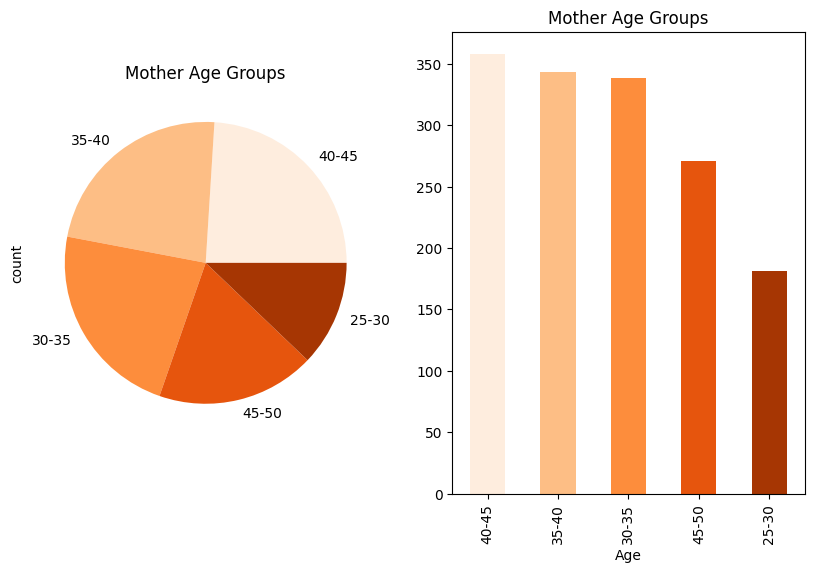

In [42]:
pp.figure(figsize=(10,6))

pp.subplot(1,2,1);df.Age.value_counts().plot(kind='pie', colors=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Mother Age Groups')

pp.subplot(1,2,2);df.Age.value_counts().plot(kind='bar', color=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Mother Age Groups')

Women between the  ages of 25 through 50 are included in this study.  The largest group ranges between the ages of 40 through 45.  The smallest respondent group is between the ages of 25 through 30. 

Text(0.5, 1.0, 'Feeling Sad or Tearful ')

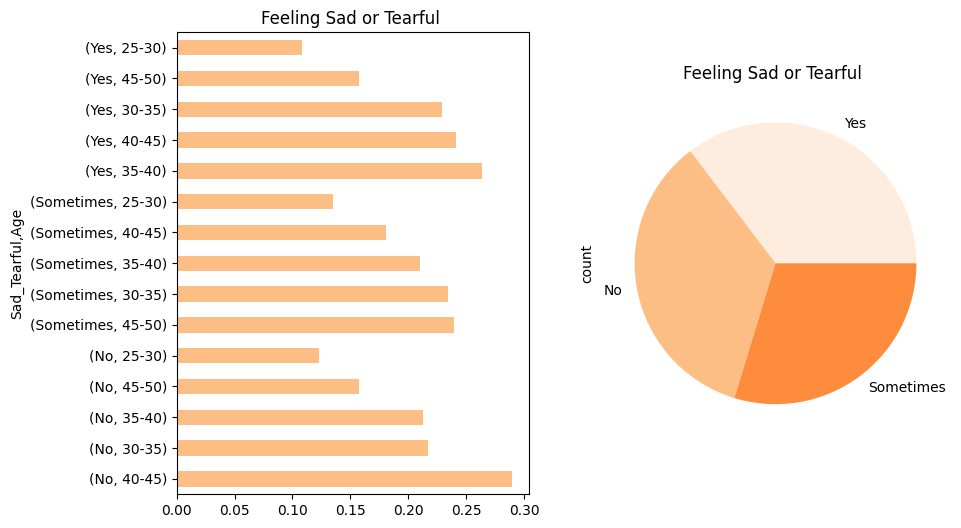

In [43]:
pp.figure(figsize=(10,6))

pp.subplot(1,2,1); sad_tearful.plot(kind='barh', color = '#fdbe85'); pp.title('Feeling Sad or Tearful ')

pp.subplot(1,2,2);df.Sad_Tearful.value_counts().plot(kind='pie', colors=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Feeling Sad or Tearful ')

#pp.subplot(1,3,2);df.Sad_Tearful.value_counts().plot(kind='bar', color=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Feeling Sad or Tearful')

#pp.subplot(1,2,2); sad_tearful.plot(kind='barh', color = '#a63603')

Text(0.5, 1.0, 'Irritable Towards Baby & Partner ')

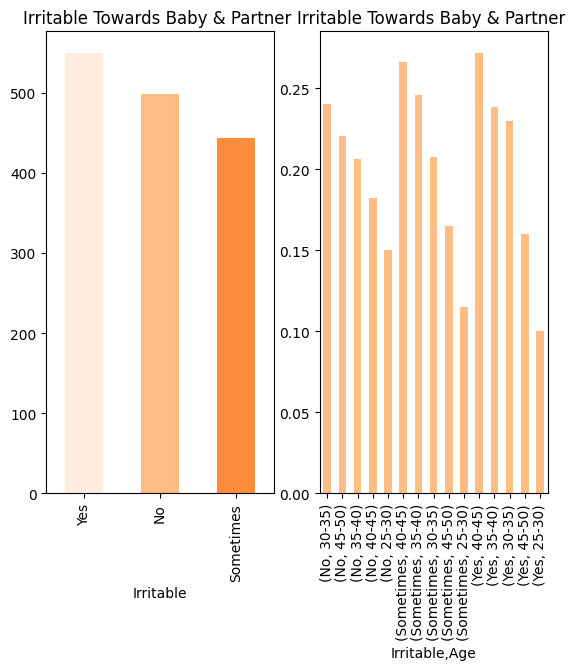

In [44]:
pp.figure(figsize=(10,6))

pp.subplot(1,3,1);df.Irritable.value_counts().plot(kind='bar', color=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Irritable Towards Baby & Partner ')

pp.subplot(1,3,2); irritable.plot(kind='bar', color = '#fdbe85'); pp.title('Irritable Towards Baby & Partner ')







A large number of respondents reported feeling irritable towards their baby and partner.  Mothers between the ages of 40-45 reported the most cases of irritability. 

Text(0.5, 1.0, 'Trouble Sleeping at Night')

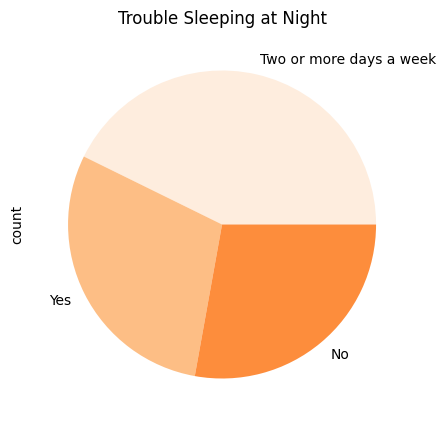

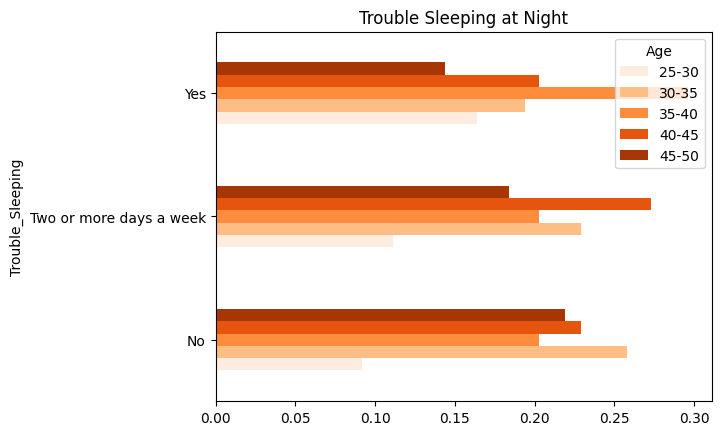

In [45]:
plt.figure(figsize = (10,5))
df.Trouble_Sleeping.value_counts().plot(kind='pie', colors=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Trouble Sleeping at Night')

trouble_sleeping.unstack().plot(kind='barh',color=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Trouble Sleeping at Night')



More than a third of the respondents have trouble sleeping at night with a significant number replying that they have trouble sleeping in general. Mothers between the ages of  40 - 45 have the most instances of having trouble sleeping two or more days a week. Mothers between the ages of 35 to 40 reported the most instances of having trouble sleeping at night in general. 

Text(0.5, 1.0, 'Overeating or Loss of Appetite ')

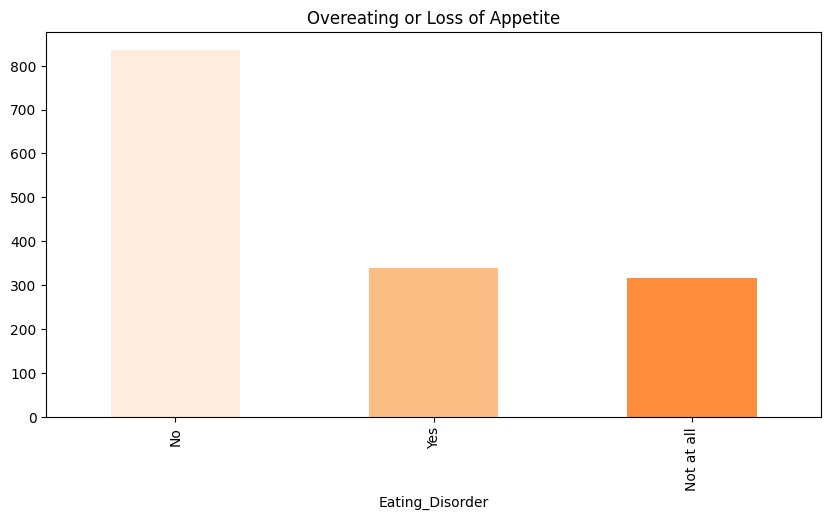

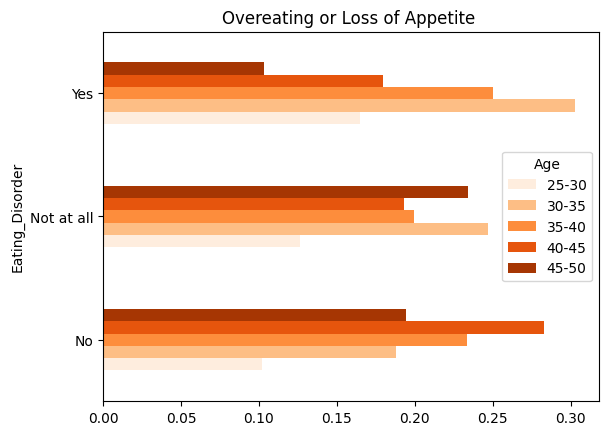

In [46]:
plt.figure(figsize = (10,5))
df.Eating_Disorder.value_counts().plot(kind='bar', color=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Overeating or Loss of Appetite')

eating_disorder.unstack().plot(kind='barh',color=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Overeating or Loss of Appetite ')



The majority of respondents reported no overeating or loss of appetite. Of the 'yes' responses, 30 -35 year olds were impacted the most. 

Text(0.5, 1.0, 'Problems Concentrating or Making Decisions ')

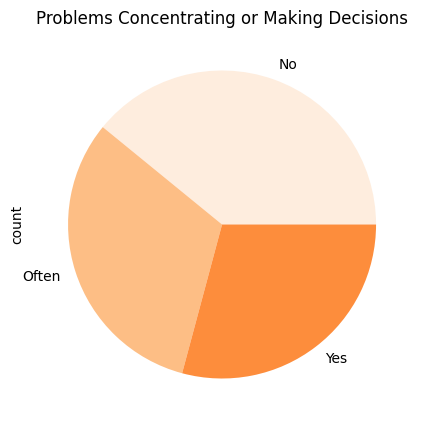

<Figure size 1000x600 with 0 Axes>

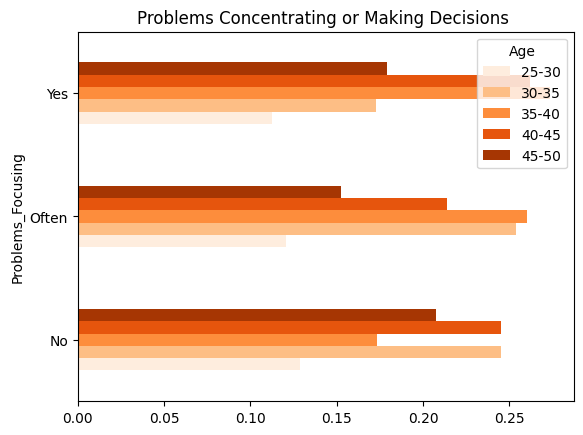

In [47]:
plt.figure(figsize = (10,5))

df.Problems_Focusing.value_counts().plot(kind='pie', colors=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Problems Concentrating or Making Decisions')

plt.figure(figsize=(10,6))

problems_focusing.unstack().plot(kind='barh',color=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Problems Concentrating or Making Decisions ')

More than half of all respondents reported having problems concentrating or making decisions both in general and often. 

Text(0.5, 1.0, 'Feeling of Guilt ')

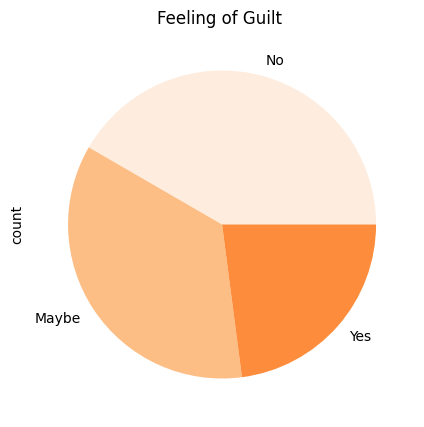

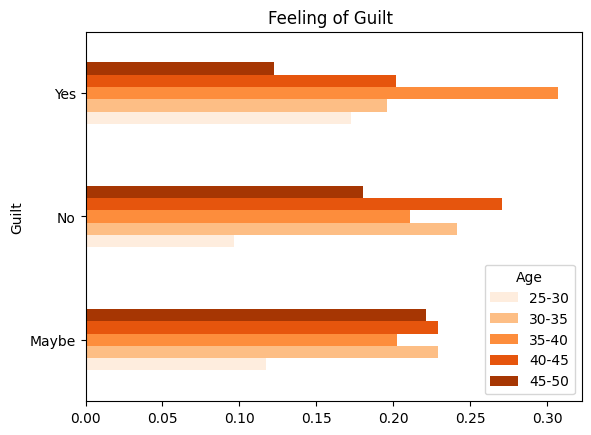

In [48]:
plt.figure(figsize = (10,5))

df.Guilt.value_counts().plot(kind='pie', colors=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Feeling of Guilt ')
guilt.unstack().plot(kind='barh',color=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Feeling of Guilt ')

More than half of the respondents stated they felt guilty or possibly felt guilty. More 35-40 year olds reported definantly feeling guilty than any other groups. 

Text(0.5, 1.0, 'Problems of Bonding with Baby ')

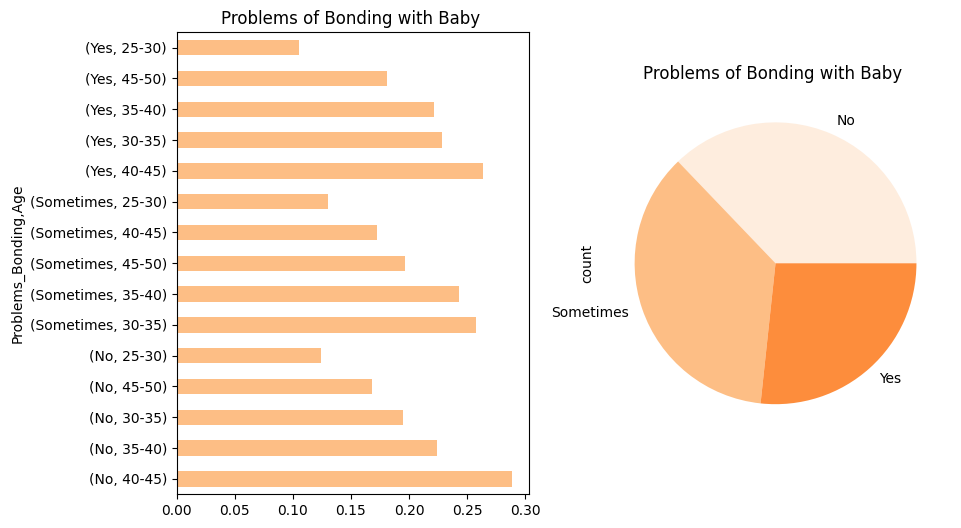

In [49]:
pp.figure(figsize=(10,6))

pp.subplot(1,2,1); problems_bonding.plot(kind='barh', color = '#fdbe85'); pp.title('Problems of Bonding with Baby ')

pp.subplot(1,2,2);df.Problems_Bonding.value_counts().plot(kind='pie', colors=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Problems of Bonding with Baby ')


More than half of the respondents reported having problems bonding with their baby sometimes or in general. 

Text(0.5, 1.0, 'Suicide Attempt  ')

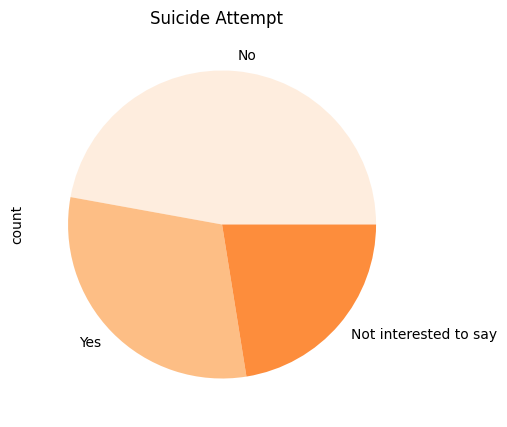

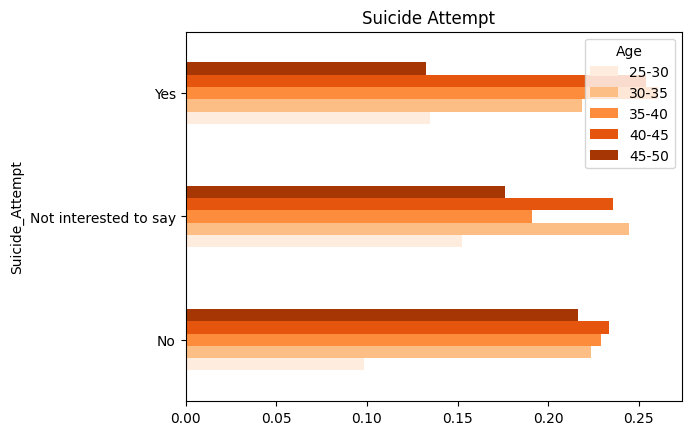

In [50]:
plt.figure(figsize = (10,5))

df.Suicide_Attempt.value_counts().plot(kind='pie', colors=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Suicide Attempt  ')
suicide_attempt.unstack().plot(kind='barh',color=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Suicide Attempt  ')

Half of the respondents either reported having attempted suicide or not willing to respond to the question. With women between 35 to 45 reporting the most suicide attempts. 

# Major Data Insights

1.Women between the ages of 25 through 50 are included in this study. <br>
2.The largest group ranges between the ages of 40 through 45. <br>
3.The smallest respondent group is between the ages of 25 through 30. <br>
4.There is no significant difference between the number of respondents that felt sad or tearful. <br>
5.Mothers between the ages of 35 to 40 reported the most responses of feeling sad and tearful.<br>
6.A large number of respondents reported feeling irritable towards their baby and partner. <br>
  Mothers between the ages of 40-45 reported the most cases of irritability.<br>
7.More than a third of the respondents have trouble sleeping at night with a significant number replying that they have trouble sleeping in general. <br>
    Mothers between the ages of 40 - 45 have the most instances of having trouble sleeping two or more days a week. <br>
    Mothers between the ages of 35 to 40 reported the most instances of having trouble sleeping at night in general.The majority of respondents reported no overeating or loss of appetite. Of the 'yes' responses, 30 -35 year olds were impacted the most.<br>
8.More than half of all respondents reported having problems concentrating or making decisions.<br>
9.More than half of the respondents stated they felt guilty or possibly felt guilty.<br>
10.More 35-40 year olds reported definitely feeling guilty than any other groups.<br>
11.A third of the respondents reported having problems bonding with their baby sometimes or in general.<br>
12.Half of the respondents either reported having attempted suicide or not willing to respond to the question. With women between 35 to 45 reporting the most suicide attempts.<br>



# Problems

The results  indicate that within the dataset of 1,491 respondents, the number of mothers possibly suffering from Postpartum depression far exceeds the documented  research that states one out of nine new mothers develop Postpartum depression.  The answers to the question referencing “Sad_Tearful”  yields the following results: No = 521, Yes = 521, and Sometimes = 443. Adding the responses for “Yes” and “Sometimes” reveals that two - thirds of the respondents experienced this symptom of Postpartum depression.  Taking into account the use of words in the other questions including sometimes, often, maybe and two or more days shows that two-thirds of the respondents indicate experiencing all of the symptoms with the exception of “Overeating or Loss of Appetite”. This question yields the following results: No = 835, Yes = 340, Not at All =316. 


Similarly, the results  indicate that within the dataset of 1,491 respondents, the number of mothers possibly suffering from Postpartum psychosis far exceeds the documented research that states  4 new mothers out of 1,000 develop Postpartum psychosis. The answers to the question regarding “Suicide Attempt”,   yields the following results: No = 703, Yes = 453, and Not Interested To Say =335. As stated previously, one of the symptoms of Postpartum psychosis is mothers hurting themselves or their baby.  The fact that 453 respondents admitted to a suicide attempt indicates that these mothers may be suffering from Postpartum psychosis. Additionally, 335 respondents answering “Not interested To Say”, may also have attempted suicide but did not want to answer “Yes”.  It is also possible that “Not Interested to  Say” responses were submitted by those who may have had thoughts of suicide but so far have made no actual attempt. The total possible suicide attempts is 788 which is more than half of the respondents. 
